<a href="https://colab.research.google.com/github/aladbukky/Data-Science-Projects-at-SAIL/blob/main/Possum_Regression__Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Possum_Regression_Machine Learning

The aim of this project is to conduct basic data cleaning, exploratory data analysis, descriptive and inferential statistics and then model building to try to predict the headlength from other features.

We shall specifically look at:
1) Can we use the features to predict a possum's head length using Machine Learning?
2) What conclusions can we draw from our univariate, bivariate, or multivariate analysis and inferential statistics?


In [ ]:
install.packages("reshape2")
install.packages("tidyverse")
install.packages('corrplot')
library(reshape2)
library(tidyverse)
library(corrplot)
library(readr)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#load the data set
possum_data <- read.csv('/possum.csv')
head(possum_data) #view first few rows

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,Vic,m,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36
2,2,1,Vic,f,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33
3,3,1,Vic,f,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34
4,4,1,Vic,f,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34
5,5,1,Vic,f,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33
6,6,1,Vic,f,1,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32


In [ ]:
# Let's check the dimension and structure of the dataset
dim(possum_data)

[1] 104  14

In [ ]:
str(possum_data)

'data.frame':	104 obs. of  14 variables:
 $ case    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ site    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Pop     : chr  "Vic" "Vic" "Vic" "Vic" ...
 $ sex     : chr  "m" "f" "f" "f" ...
 $ age     : int  8 6 6 6 2 1 2 6 9 6 ...
 $ hdlngth : num  94.1 92.5 94 93.2 91.5 93.1 95.3 94.8 93.4 91.8 ...
 $ skullw  : num  60.4 57.6 60 57.1 56.3 54.8 58.2 57.6 56.3 58 ...
 $ totlngth: num  89 91.5 95.5 92 85.5 90.5 89.5 91 91.5 89.5 ...
 $ taill   : num  36 36.5 39 38 36 35.5 36 37 37 37.5 ...
 $ footlgth: num  74.5 72.5 75.4 76.1 71 73.2 71.5 72.7 72.4 70.9 ...
 $ earconch: num  54.5 51.2 51.9 52.2 53.2 53.6 52 53.9 52.9 53.4 ...
 $ eye     : num  15.2 16 15.5 15.2 15.1 14.2 14.2 14.5 15.5 14.4 ...
 $ chest   : num  28 28.5 30 28 28.5 30 30 29 28 27.5 ...
 $ belly   : num  36 33 34 34 33 32 34.5 34 33 32 ...


In [ ]:
#let's check if there are missing values in the data set
sum(is.na(possum_data))

[1] 3

In [ ]:
#checking for where the missing values are
na_values <- which(is.na(possum_data), arr.ind = TRUE)
na_values

row,col
44,5
46,5
41,10


In [ ]:
# Retrieve the names of the columns
names(possum_data)

[1] "case"     "site"     "Pop"      "sex"      "age"      "hdlngth" 
 [7] "skullw"   "totlngth" "taill"    "footlgth" "earconch" "eye"     
[13] "chest"    "belly"

In [ ]:
# Seeing that the missing values are negligble, it can be handled by filling with the mean value of the columns
poss_no_na <- na.omit(possum_data)

mean_age <- round(mean(poss_no_na$age), 0) #getting the mean of the age column and round up

#Lets do same for the footlength
mean_footlngth <- round(mean(poss_no_na$footlgth), 1) #rounded up to 1 digit

mean_age


[1] 4

In [ ]:
mean_footlngth

[1] 68.4

In [ ]:
#replace the mean of both columns to fill the null values
possum_data$age <- ifelse(is.na(possum_data$age), 4, possum_data$age)
possum_data$footlgth <- ifelse(is.na(possum_data$footlgth), 4, possum_data$footlgth)

In [ ]:
#checking to see if all null values are now replaced.
sum(is.na(possum_data))

[1] 0

In [ ]:
#lets check for duplicate values

anyDuplicated(possum_data) #result shows there are no duplicate values

[1] 0

In [ ]:
#Next in cleaning this data is to check for outliers and handle it
#lets first retrieve the numeric columns
numeric_cols <- sum(sapply(possum_data, is.numeric))
numeric_cols

[1] 12

In [ ]:
numeric_cols <- sapply(possum_data, is.numeric)
numeric_cols

case     site      Pop      sex      age  hdlngth   skullw totlngth 
    TRUE     TRUE    FALSE    FALSE     TRUE     TRUE     TRUE     TRUE 
   taill footlgth earconch      eye    chest    belly 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE

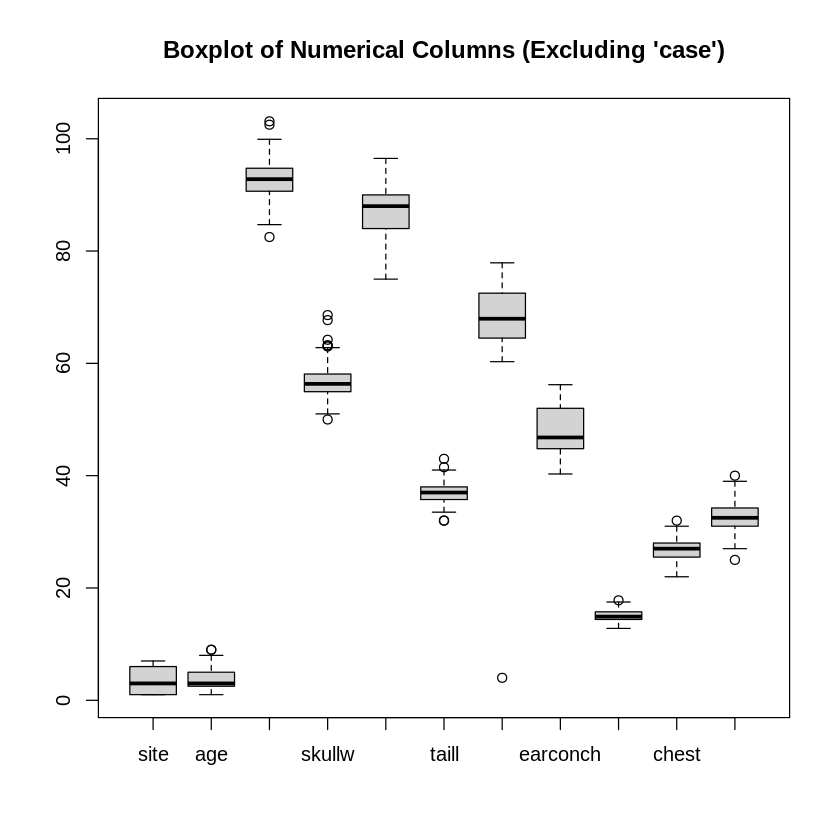

In [ ]:
# Lets visualise using boxplots to spot the outliers
#boxplot(pos[, numerical_cols], main = "Boxplot of Numerical Columns")

cols_to_plot <- setdiff(names(possum_data)[sapply(possum_data, is.numeric)], "case") # excluding case because it's just a serial number of the observation
boxplot(possum_data[, cols_to_plot],
        main = "Boxplot of Numerical Columns (Excluding 'case')",
        names = cols_to_plot,  # Add labels for all plots
        cex.axis = 1.0,        # Increase font size of axis labels (adjust as needed)
        boxwex = 0.8)

In [ ]:
# z-score is a statistical method for detecting and removing outliers. The z-score method is shorter and simple to implement

cols_to_analyze <- setdiff(names(possum_data)[sapply(possum_data, is.numeric)], "case") # Select the needed columns
outliers_list <- list()                                                 #  initialize an empty list
for (col in cols_to_analyze) {
  z_scores <- scale(possum_data[[col]])
  outliers <- possum_data[[col]][abs(z_scores) > 3]
  outliers_list[[col]] <- outliers
}                                                                       # loop through the whole columns
outliers_list

$site
integer(0)

$age
numeric(0)

$hdlngth
numeric(0)

$skullw
[1] 67.7 68.6

$totlngth
numeric(0)

$taill
[1] 43

$footlgth
[1] 4

$earconch
numeric(0)

$eye
numeric(0)

$chest
numeric(0)

$belly
numeric(0)

In [ ]:
# remove the outliers
for (col in cols_to_analyze) {
  z_scores <- scale(possum_data[[col]])
  outlier_indices <- which(abs(z_scores) > 3)
  if (length(outlier_indices) > 0) {
    possum_data <- possum_data[-outlier_indices, ]
  }
}

In [ ]:
cols_to_analyze <- setdiff(names(possum_data)[sapply(possum_data, is.numeric)], "case") # Select the needed columns
outliers_list <- list()                                                 #  initialize an empty list
for (col in cols_to_analyze) {
  z_scores <- scale(possum_data[[col]])
  outliers <- possum_data[[col]][abs(z_scores) > 3]
  outliers_list[[col]] <- outliers
}                                                                       # loop through the whole columns
outliers_list

$site
integer(0)

$age
numeric(0)

$hdlngth
numeric(0)

$skullw
numeric(0)

$totlngth
numeric(0)

$taill
numeric(0)

$footlgth
numeric(0)

$earconch
numeric(0)

$eye
numeric(0)

$chest
numeric(0)

$belly
numeric(0)

We can see that all the outliers have been removed.

In [ ]:
# lets save our cleaned dataset...
write.csv(possum_data, file = "cleaned_possum_d.csv", row.names = FALSE)



In [ ]:
possum_cleaned <- possum_data
head(possum_cleaned, 10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,Vic,m,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,2,1,Vic,f,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,3,1,Vic,f,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,4,1,Vic,f,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,5,1,Vic,f,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
6,6,1,Vic,f,1,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
7,7,1,Vic,m,2,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
8,8,1,Vic,f,6,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
9,9,1,Vic,f,9,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0


## Exploratory Data Analysis
Let's go further to do some exploratory analysis on the cleaned data set. This will help us discover patterns, check for assumptions and provides a provides a better understanding of data set variables and the relationships between them.

In [ ]:
#extract the numeric columns for
numeric_vars <- possum_cleaned[, sapply(possum_cleaned, is.numeric)]
#drop case column since it represent ID
numeric_vars <- select(numeric_vars, -case)
head(numeric_vars,5)

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36
2,1,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33
3,1,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34
4,1,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34
5,1,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33


In [ ]:
#Lets calculate correlation matrix
cor_matrix <- cor(numeric_vars, use = "complete.obs")
View(cor_matrix)

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
site,1.00000000,-0.16289827,-0.1753376,-0.12299879,-0.2610947,0.41464339,-0.78357076,-0.81668484,-0.03309163,-0.3605591,-0.19212490
age,-0.16289827,1.00000000,0.3186801,0.33542405,0.2605258,0.07580707,0.14091194,0.10430000,0.20085684,0.3231994,0.33348062
hdlngth,-0.17533760,0.31868009,1.0000000,0.80376690,0.6862216,0.27002418,0.38599259,0.10529230,0.34827513,0.6285944,0.55780459
skullw,-0.12299879,0.33542405,0.8037669,1.00000000,0.6237338,0.30615733,0.30072333,0.00542924,0.37707113,0.6566554,0.54873589
totlngth,-0.26109470,0.26052583,0.6862216,0.62373375,1.0000000,0.56409528,0.43617198,0.13487146,0.24120990,0.5815433,0.51437200
taill,0.41464339,0.07580707,0.2700242,0.30615733,0.5640953,1.00000000,-0.15932574,-0.41449562,0.13580664,0.1513703,0.26452384
footlgth,-0.78357076,0.14091194,0.3859926,0.30072333,0.4361720,-0.15932574,1.00000000,0.78568862,-0.01002809,0.4479620,0.30489897
earconch,-0.81668484,0.10430000,0.1052923,0.00542924,0.1348715,-0.41449562,0.78568862,1.00000000,-0.14782399,0.2126180,0.06767685
eye,-0.03309163,0.20085684,0.3482751,0.37707113,0.2412099,0.13580664,-0.01002809,-0.14782399,1.00000000,0.1286367,0.21669067
chest,-0.36055911,0.32319942,0.6285944,0.65665540,0.5815433,0.15137026,0.44796198,0.21261797,0.12863674,1.0000000,0.61293497


From the result, the correlation matrix reveals the following;

1. footlength with earconch has a correlation of 0.78.
2. headlength and skullwidth has a corrletion of 0.71.

3. Chest with Headlength and Chest with Skullwidth has a correlation of 0.63.

4. Chest with Belly has a correlation of 0.61


 Let's visualize the plot for better intepretation

Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“"t1.col" is not a graphical parameter”
Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“"t1.srt" is not a graphical parameter”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“"t1.col" is not a graphical parameter”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“"t1.srt" is not a graphical parameter”
Warning message in title(title, ...):
“"t1.col" is not a graphical parameter”
Warning message in title(title, ...):
“"t1.srt" is not a graphical parameter”


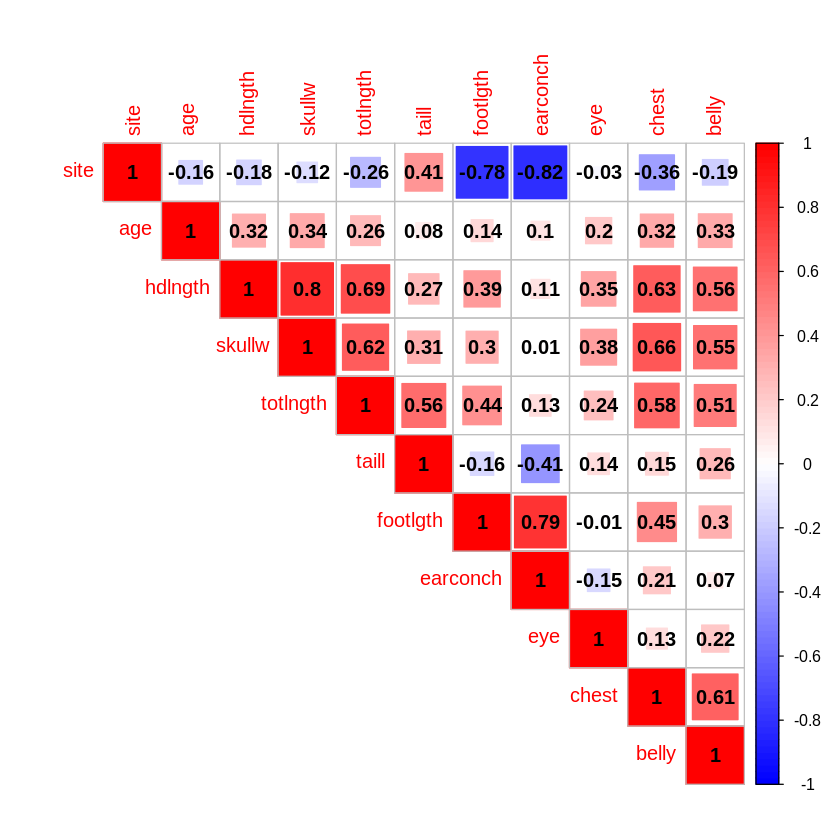

In [ ]:
#create the heatmap using corrplot

heatmap_poss <- corrplot(cor_matrix, method = "square", type ="upper",
         t1.col = "black", t1.srt = 45,
         addCoef.col = "black", # Add correlation coefficient
         col = colorRampPalette(c("blue", "white", "red"))(100),
         number.cex = 1) # adjust the text size


Exploring further, we would be looking into the univarate, bivarate and multivarate analysis

Starting with the univariate analysis of the numerical columns.

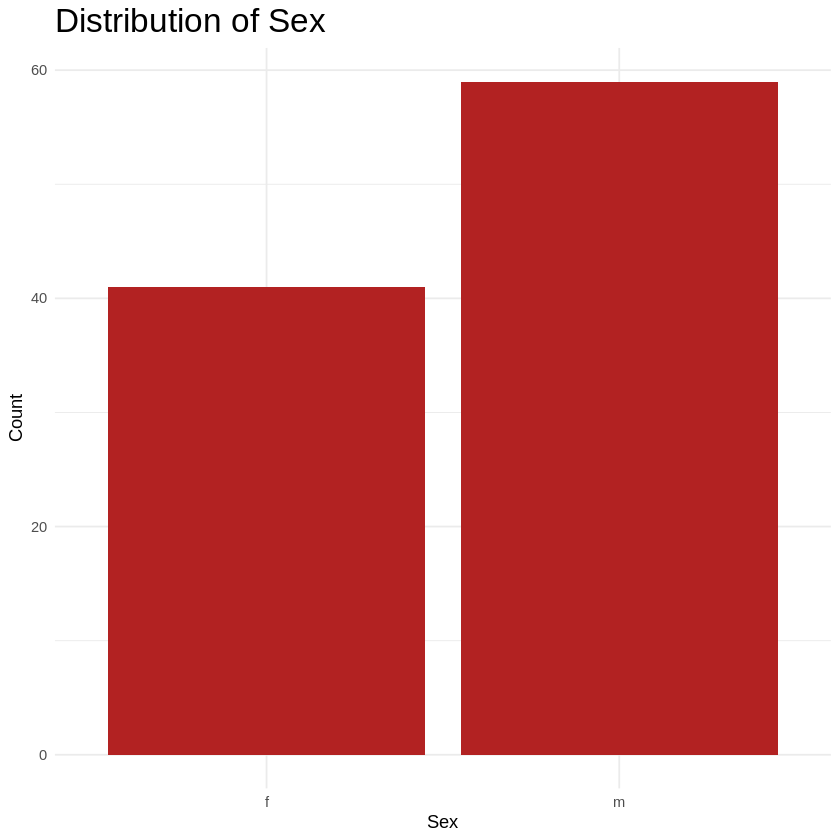

In [ ]:
sex <- ggplot(possum_cleaned) +
 aes(x = sex) +
 geom_bar(fill = "#B22222") +
 labs(x = "Sex", y = "Count", title = "Distribution of Sex") +
 theme_minimal()+ theme(plot.title = element_text(size = 20))
sex

Plot above shows that there are more male possums (59) than female possums (41)

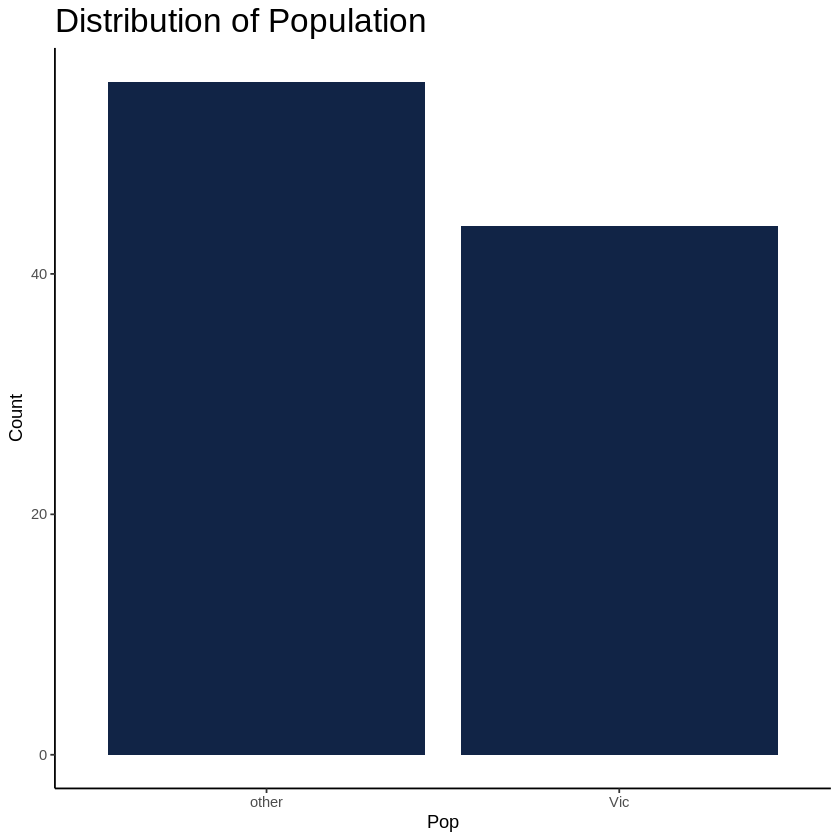

In [ ]:
pop <- ggplot(possum_cleaned) +
 aes(x = Pop) +
 geom_bar(fill = "#112446") +
 labs(x = "Pop", y = "Count", title = "Distribution of Population") +
 theme_classic() + theme(plot.title = element_text(size = 20))
pop

Above plot show there are more populations of possum in the Other location than in victoria population

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


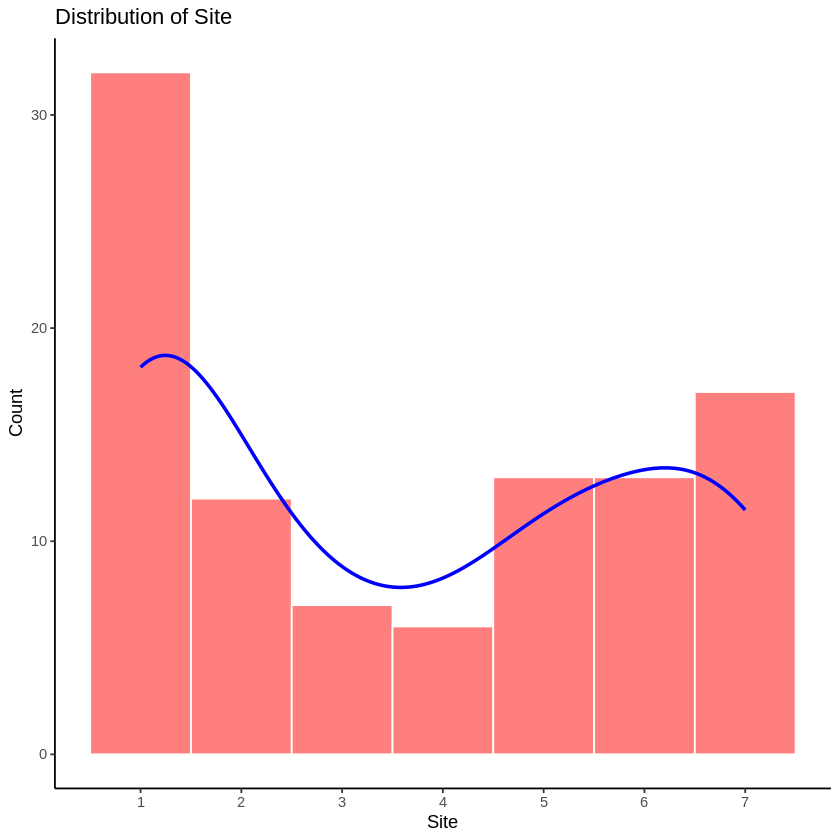

In [ ]:
site <- ggplot(possum_cleaned, aes(x = site)) +
  geom_histogram(binwidth = 1, fill = "red", alpha = 0.5, color ="white") +
  geom_density(aes(y = ..count..), color = "blue", linewidth = 1) +
  scale_x_continuous(breaks = 1:7) +
  labs(title = "Distribution of Site", x = "Site", y = "Count") +
  theme_classic()
site

The plot above shows the site is a bimodal distribution, suggesting there are two distinct groups in the data distribution

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


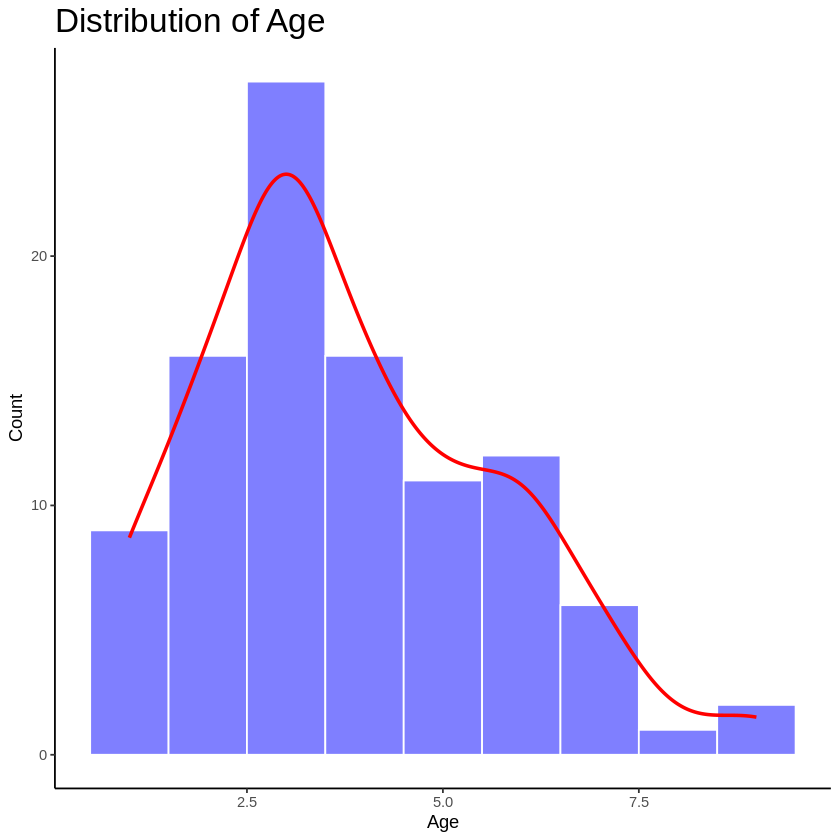

In [ ]:
age <- ggplot(possum_cleaned, aes(x = age )) +
  geom_histogram(binwidth = 1, fill = "blue", alpha = 0.5, color ="white") +
  geom_density(aes(y = ..count..), color = "red", size = 1) +
  #scale_x_continuous(breaks = 1:7) +
  labs(title = "Distribution of Age", x = "Age", y = "Count") +
  theme_classic() + theme(plot.title = element_text(size = 20))
age


The age histogram and density is normally distributed and it is asymmetrical, that is right skewed. This implies, that while most of the age values cluster around the peak, there more high age values that are less fregquent.

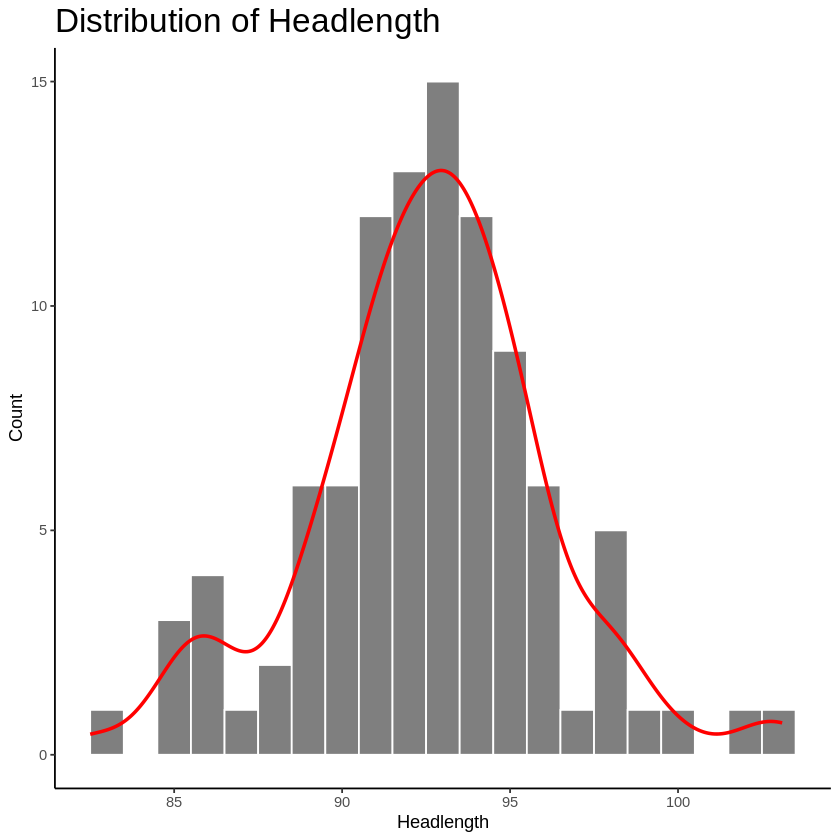

In [ ]:
headlength <- ggplot(possum_cleaned, aes(x =hdlngth)) +
  geom_histogram(binwidth = 1, fill = "black", alpha = 0.5, color ="white") +
  geom_density(aes(y = ..count..), color = "red", size = 1) +
  #scale_x_continuous(breaks = 1:7) +
  labs(title = "Distribution of Headlength", x = "Headlength", y = "Count") +
  theme_classic() + theme(plot.title = element_text(size = 20))
headlength

The headlength is normally distributed. As seen, it is unimodal, with most values clustered around the peak at the middle point - 92.5.

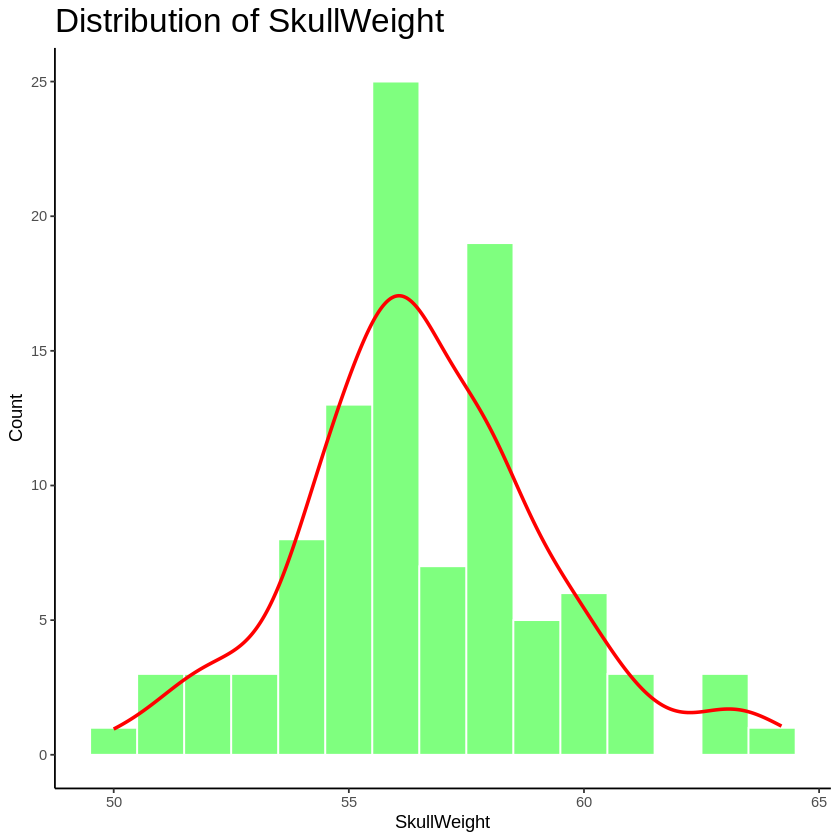

In [ ]:
SkullWeight <- ggplot(possum_cleaned, aes(x =skullw)) +
  geom_histogram(binwidth = 1, fill = "green", alpha = 0.5, color ="white") +
  geom_density(aes(y = ..count..), color = "red", size = 1) +
  #scale_x_continuous(breaks = 1:7) +
  labs(title = "Distribution of SkullWeight", x = "SkullWeight", y = "Count") +
  theme_classic()+
   theme(plot.title = element_text(size = 20))
SkullWeight

The skull weight plot is normally distributed. As seen, it is unimodal, with most values clustered around the peak at the middle.

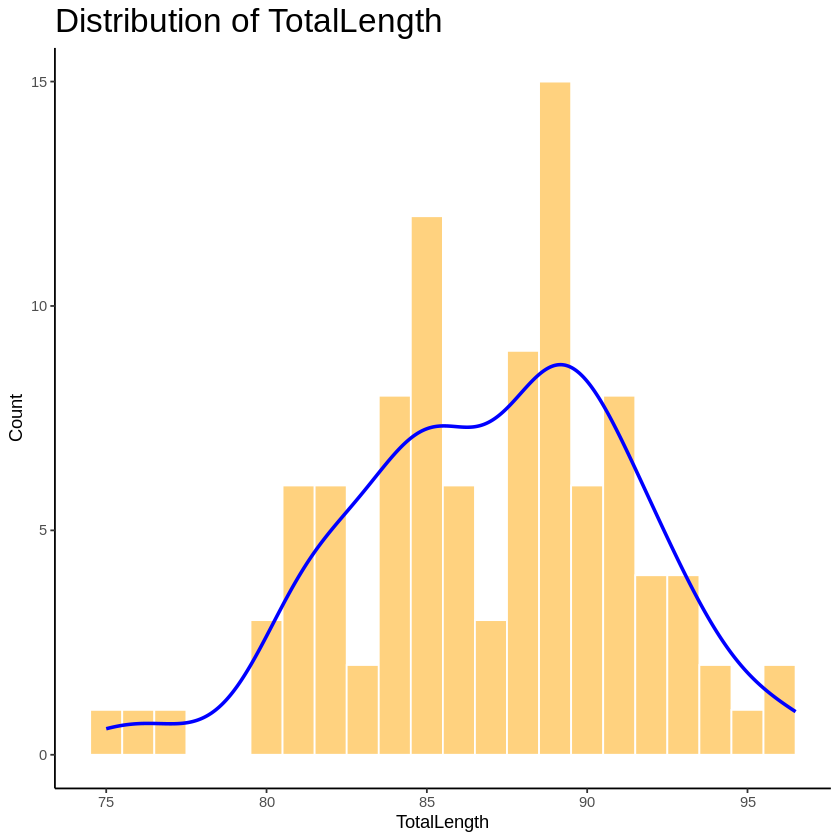

In [ ]:
totallngth<- ggplot(possum_cleaned, aes(x =totlngth)) +
  geom_histogram(binwidth = 1, fill = "orange", alpha = 0.5, color ="white") +
  geom_density(aes(y = ..count..), color = "blue", size = 1) +
  #scale_x_continuous(breaks = 1:7) +
  labs(title = "Distribution of TotalLength", x = "TotalLength", y = "Count") +
  theme_classic()+ theme(plot.title = element_text(size = 20))
totallngth

The total length distribution of the possums are normally distributed but assymetrical, that is, it is slightly right skewed. This implies there are more high values that are less frequent.

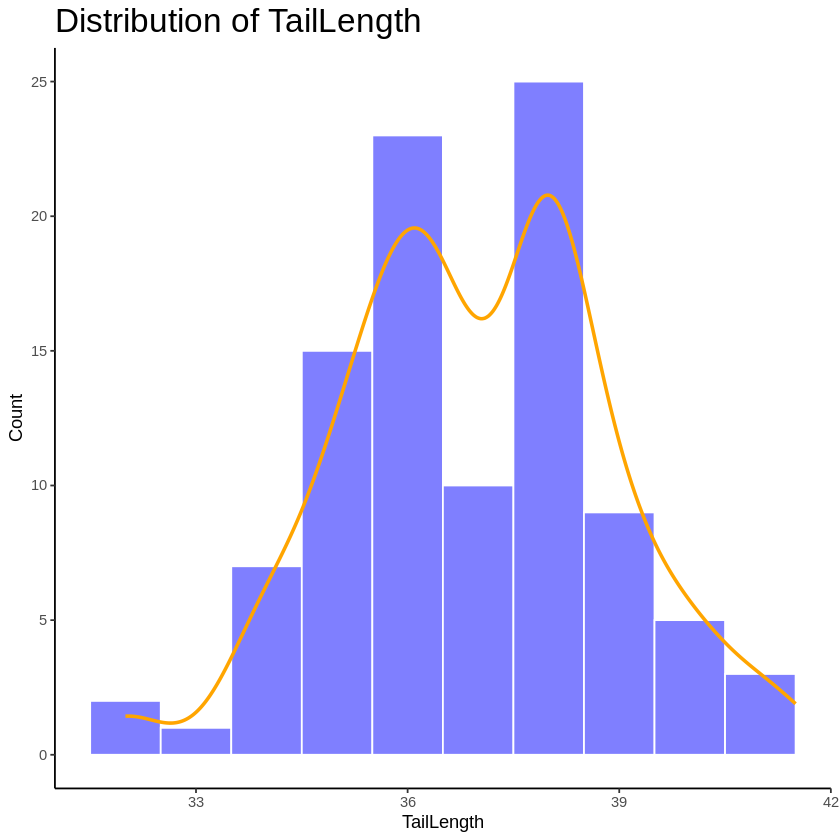

In [ ]:
tail <- ggplot(possum_cleaned, aes(x =taill)) +
  geom_histogram(binwidth = 1, fill = "blue", alpha = 0.5, color ="white") +
  geom_density(aes(y = ..count..), color = "orange", size = 1) +
  #scale_x_continuous(breaks = 1:7) +
  labs(title = "Distribution of TailLength", x = "TailLength", y = "Count") +
  theme_classic() +  theme(plot.title = element_text(size = 20))
tail

The foot length plot above shows two distinct peaks, indicating a bimodal distribution, indicating the presence of two distinct groups within the data, each with different common values for the taillength.

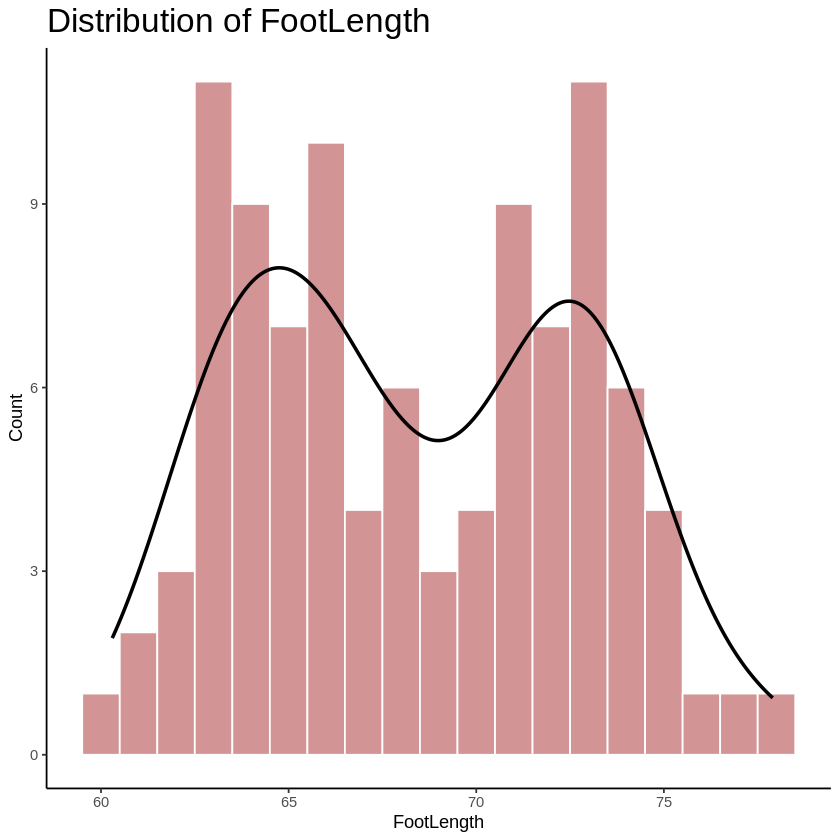

In [ ]:
footlgth<- ggplot(possum_cleaned, aes(x =footlgth)) +
  geom_histogram(binwidth = 1, fill = "brown", alpha = 0.5, color ="white") +
  geom_density(aes(y = ..count..), color = "black", size = 1) +
  #scale_x_continuous(breaks = 1:7) +
  labs(title = "Distribution of FootLength", x = "FootLength", y = "Count") +
  theme_classic() + theme(plot.title = element_text(size = 20))
footlgth

The foot length plot above shows two distinct peaks, indicating a bimodal distribution, indicating the presence of two distinct groups within the data, each with different common values for the foot length.

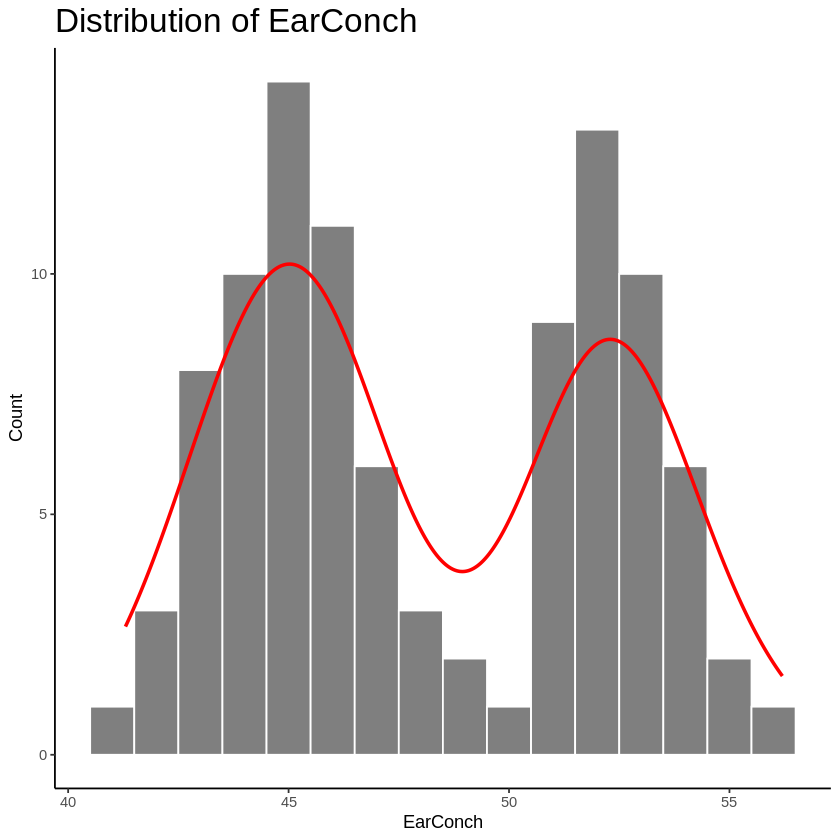

In [ ]:
earconch<- ggplot(possum_cleaned, aes(x =earconch)) +
  geom_histogram(binwidth = 1, fill = "black", alpha = 0.5, color ="white") +
  geom_density(aes(y = ..count..), color = "red", size = 1) +
  #scale_x_continuous(breaks = 1:7) +
  labs(title = "Distribution of EarConch", x = "EarConch", y = "Count") +
  theme_classic() +  theme(plot.title = element_text(size = 20))
earconch

The plot above shows two distinct peaks, indicating a bimodal distribution.

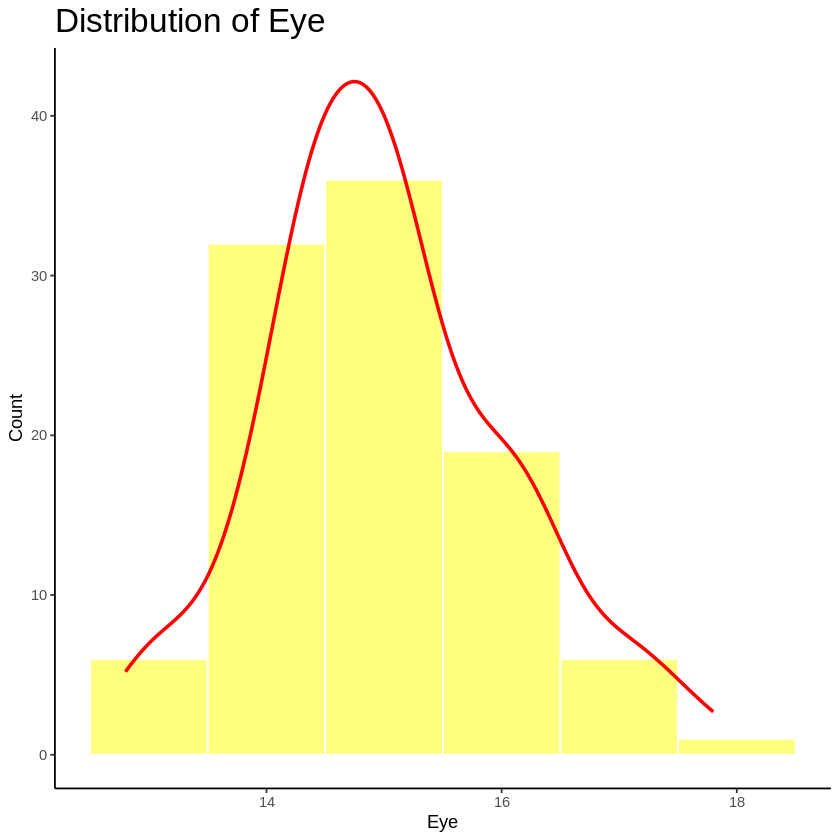

In [ ]:
eye <- ggplot(possum_cleaned, aes(x =eye)) +
  geom_histogram(binwidth = 1, fill = "yellow", alpha = 0.5, color ="white") +
  geom_density(aes(y = ..count..), color = "red", size = 1) +
  #scale_x_continuous(breaks = 1:7) +
  labs(title = "Distribution of Eye", x = "Eye", y = "Count") +
  theme_classic() +  theme(plot.title = element_text(size = 20))
eye

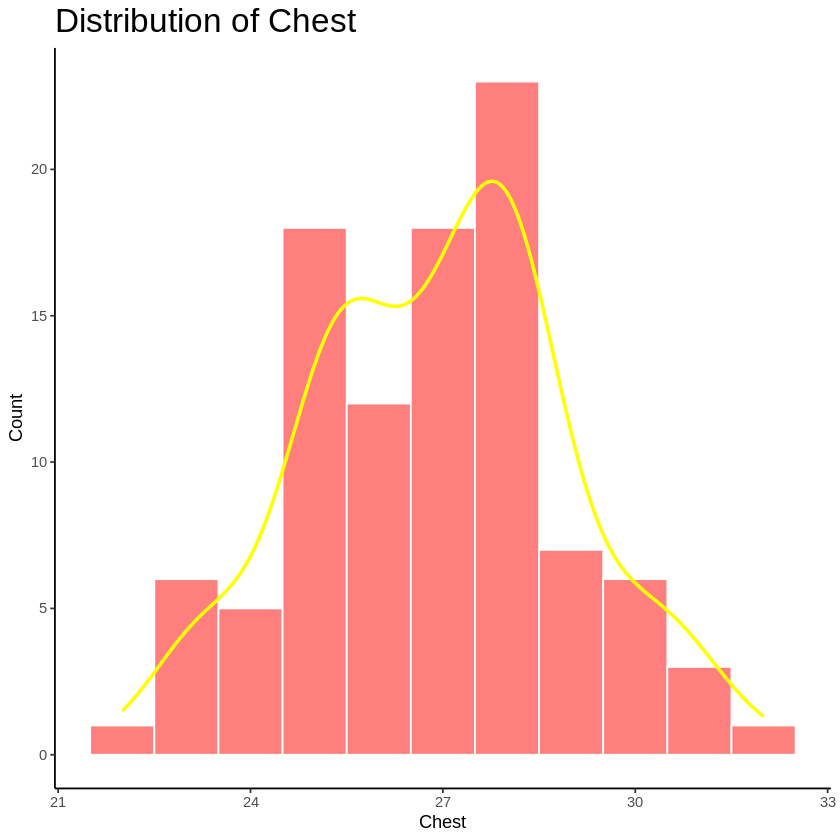

In [ ]:
chest <- ggplot(possum_cleaned, aes(x =chest)) +
  geom_histogram(binwidth = 1, fill = "red", alpha = 0.5, color ="white") +
  geom_density(aes(y = ..count..), color = "yellow", size = 1) +
  #scale_x_continuous(breaks = 1:7) +
  labs(title = "Distribution of Chest", x = "Chest", y = "Count") +
  theme_classic() + theme(plot.title = element_text(size = 20))
chest

#Bivarate Analysis
This analysis involves comparing two or more variables to see how they correlate



In [ ]:
library(ggplot2)

NULL

`geom_smooth()` using formula = 'y ~ x'


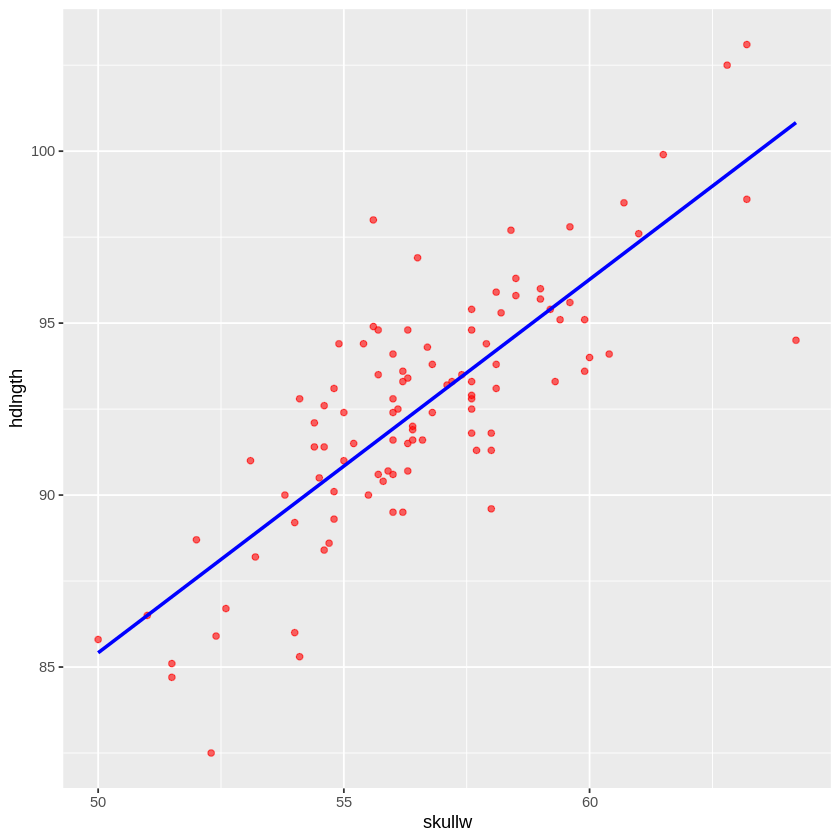

In [ ]:
headvsskull <- ggplot(possum_cleaned, aes(x = skullw, y = hdlngth)) +
  geom_point(color = "red", alpha = 0.6) +
  geom_smooth(method = "lm", color = "blue", se = FALSE)
  labs(title = "Scatter Plot of Skull Width vs Head Length",
       x = "Skull Width (skullw)",
       y = "Head Length (hdlngth)") +
  theme_minimal() + theme(plot.title = element_text(size = 20))
headvsskull

The graph implies there is a linear correlation between the headlength and skull

NULL

`geom_smooth()` using formula = 'y ~ x'


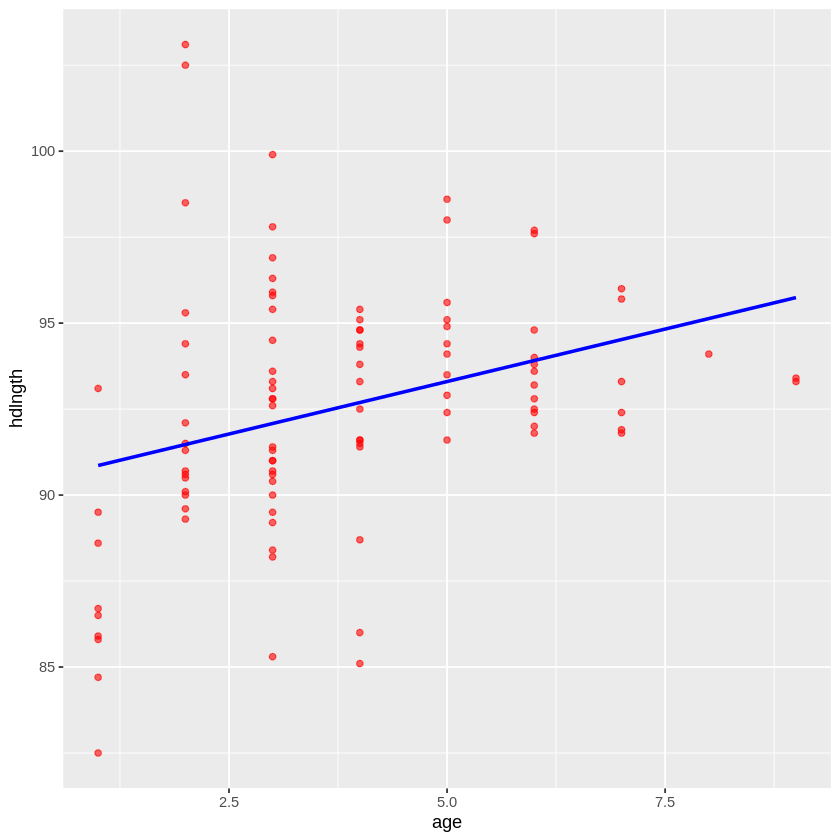

In [ ]:
headvsage <- ggplot(possum_cleaned, aes(x = age, y = hdlngth)) +
  geom_point(color = "red", alpha = 0.6) +
  geom_smooth(method = "lm", color = "blue", se = FALSE)
  labs(title = "Scatter Plot of Headlength vs Age",
       x = "Age",
       y = "Head Length") +
  theme_minimal() + theme(plot.title = element_text(size = 20))
headvsage



The plot above implies there is no correlation between the age and headlength

NULL

`geom_smooth()` using formula = 'y ~ x'


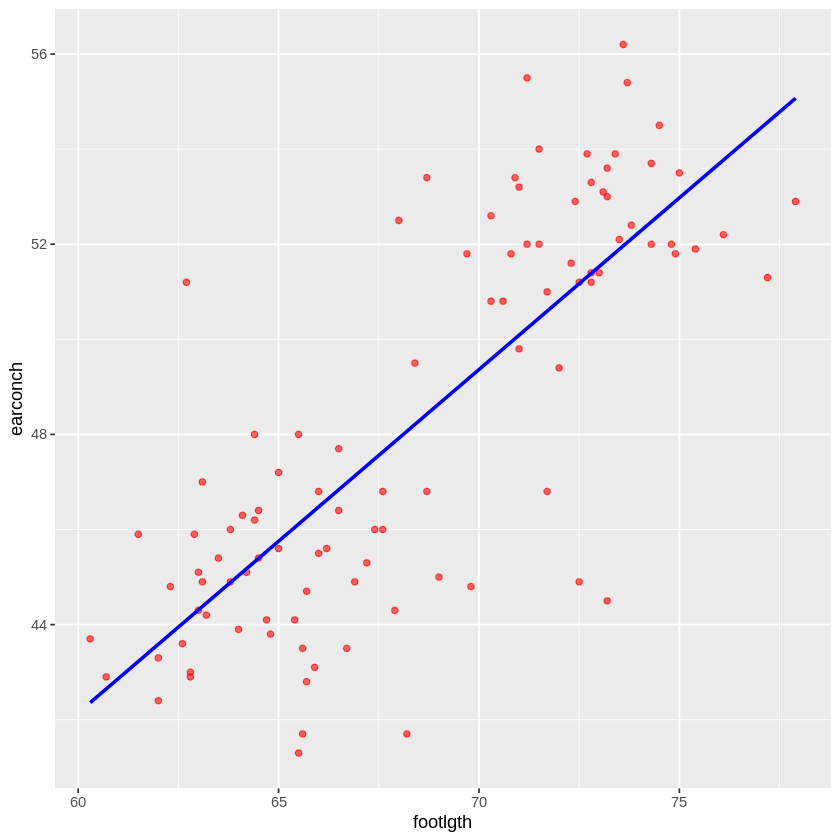

In [ ]:
footlengthvsearconch <- ggplot(possum_cleaned, aes(x = footlgth, y = earconch)) +
  geom_point(color = "red", alpha = 0.6) +
  geom_smooth(method = "lm", color = "blue", se = FALSE)
  labs(title = "Scatter Plot of Footlength vs Earconch",
       x = "Footlength",
       y = "Earconch") +
  theme_minimal() + theme(plot.title = element_text(size = 20))
footlengthvsearconch

This plot shows there is a linear correlation between the footlength and earconch

`geom_smooth()` using formula = 'y ~ x'


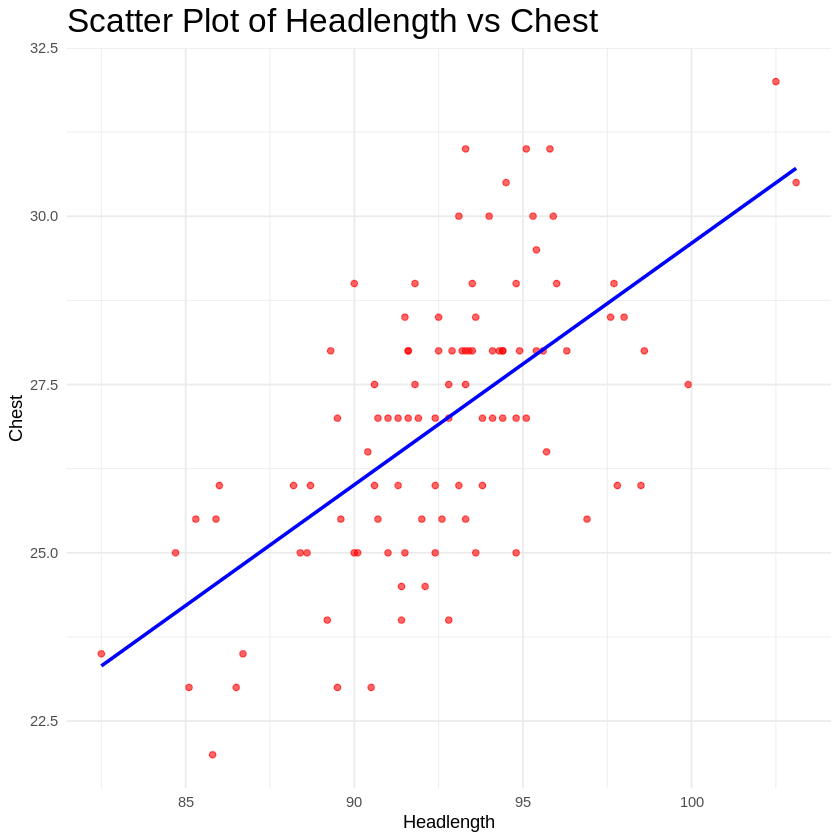

In [ ]:
headlengthvsChest <- ggplot(possum_cleaned, aes(x = hdlngth, y = chest)) +
  geom_point(color = "red", alpha = 0.6) +
  geom_smooth(method = "lm", color = "blue", se = FALSE) +
  labs(title = "Scatter Plot of Headlength vs Chest", x = "Headlength", y = "Chest") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20))

headlengthvsChest

Plot shows there is a linear correlation between the headlength and chest

`geom_smooth()` using formula = 'y ~ x'


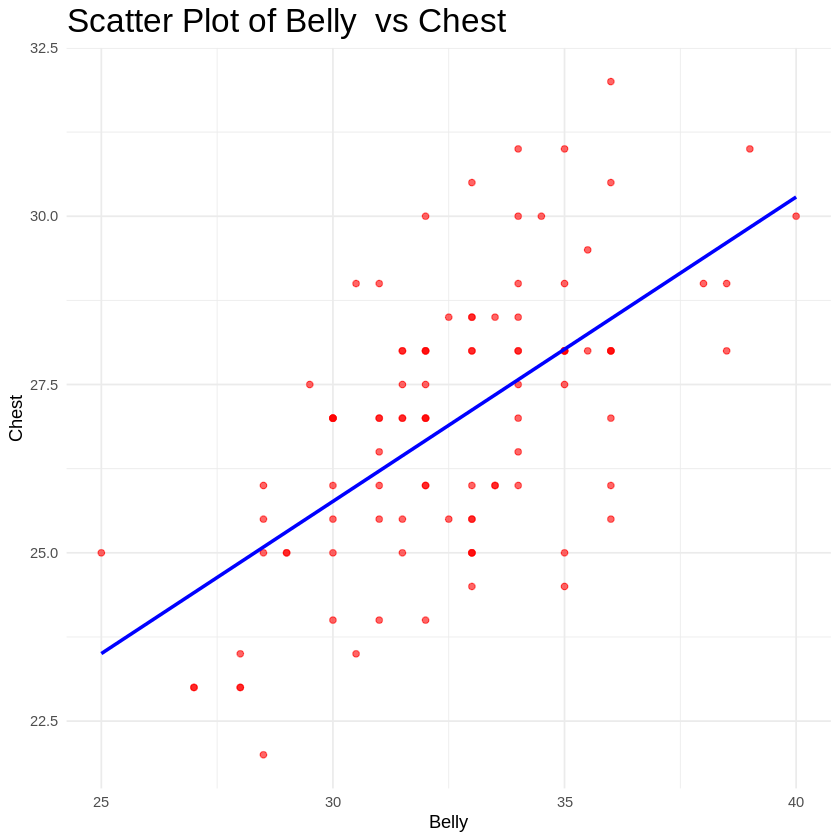

In [ ]:
bellyvschest <- ggplot(possum_cleaned, aes(x = belly, y = chest)) +
  geom_point(color = "red", alpha = 0.6) +
  geom_smooth(method = "lm", color = "blue", se = FALSE)+
  labs(title = "Scatter Plot of Belly  vs Chest", x = "Belly", y = "Chest") +
  theme_minimal() + theme(plot.title = element_text(size = 20))
bellyvschest

Plot shows there is a moderate correlation between the belly and chest

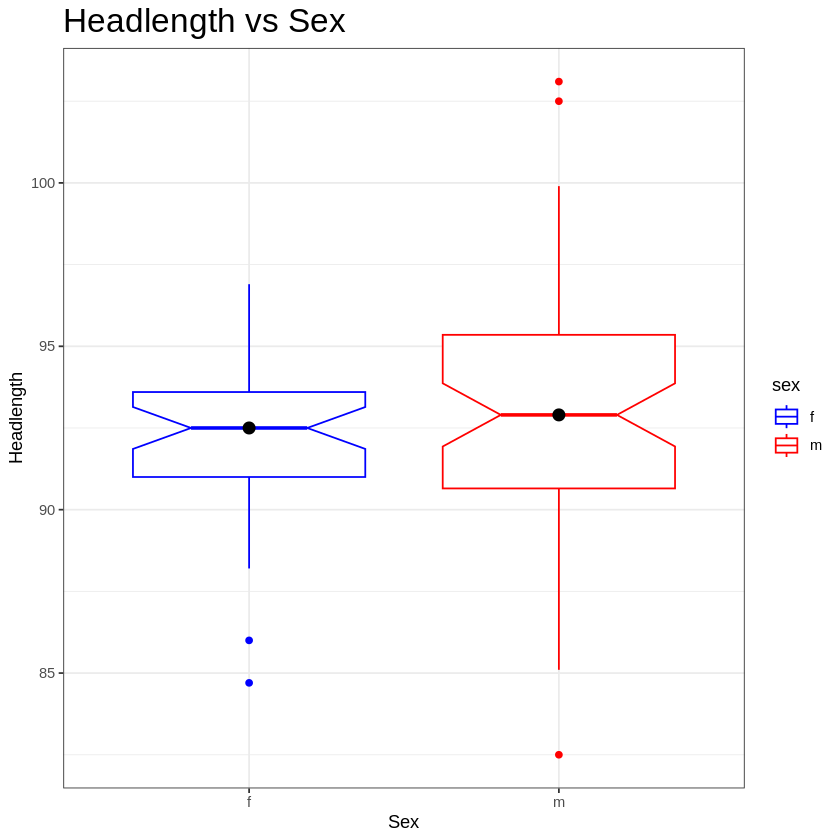

In [ ]:
headlgthvssex <- ggplot(possum_cleaned, aes(x = sex, y = hdlngth, color = sex)) +
  geom_boxplot(notch = TRUE) +
  stat_summary(fun.y = median, geom = "point", size = 3, color = "black") +
  labs(title = "Headlength vs Sex", x = "Sex", y = "Headlength") +
  scale_color_manual(values = c("blue", "red")) +
  theme_bw() + theme(plot.title = element_text(size = 20))
headlgthvssex

Plot above reveals that the head length of the male's head is bigger than the female Possum.

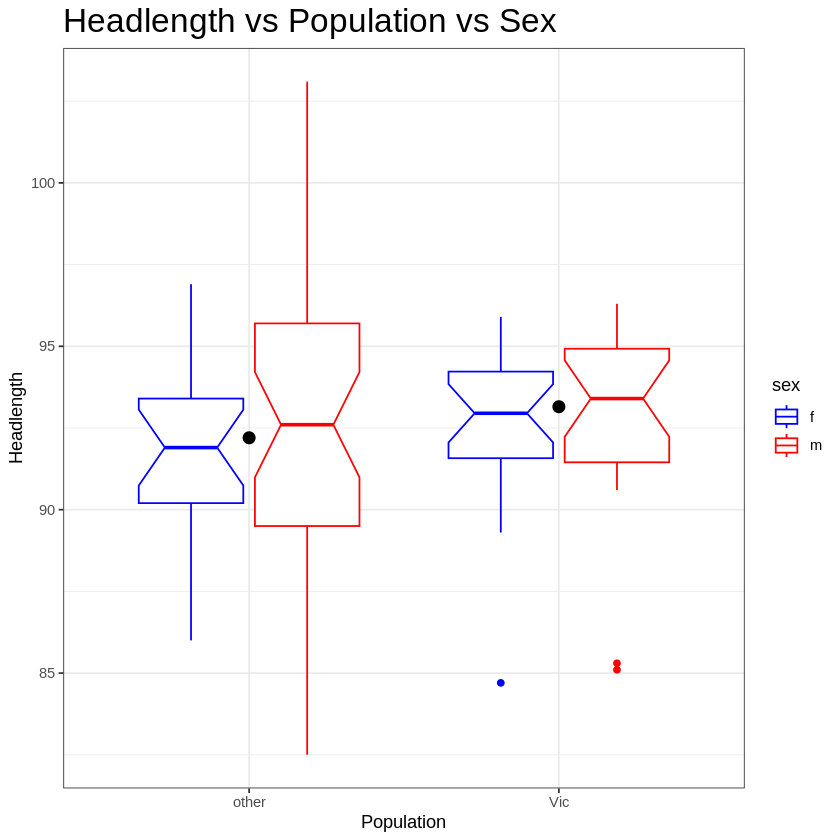

In [ ]:
headlgthvspopbysex <- ggplot(possum_cleaned, aes(x = Pop, y = hdlngth, color = sex)) +
  geom_boxplot(notch = TRUE) +
  stat_summary(fun.y = median, geom = "point", size = 3, color = "black") +
  labs(title = "Headlength vs Population vs Sex", x = "Population", y = "Headlength") +
  scale_color_manual(values = c("blue", "red")) +
  theme_bw() + theme(plot.title = element_text(size = 20))
headlgthvspopbysex

Plot above shows that the headlength of male and female Possum belonging to other categories (New South Wales or Queensland) is bigger than the those population at Victoria.


The concluding part of this project will be updated soon.